--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Análisis exploratorio del dataset
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Informacion de las columnas
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attri

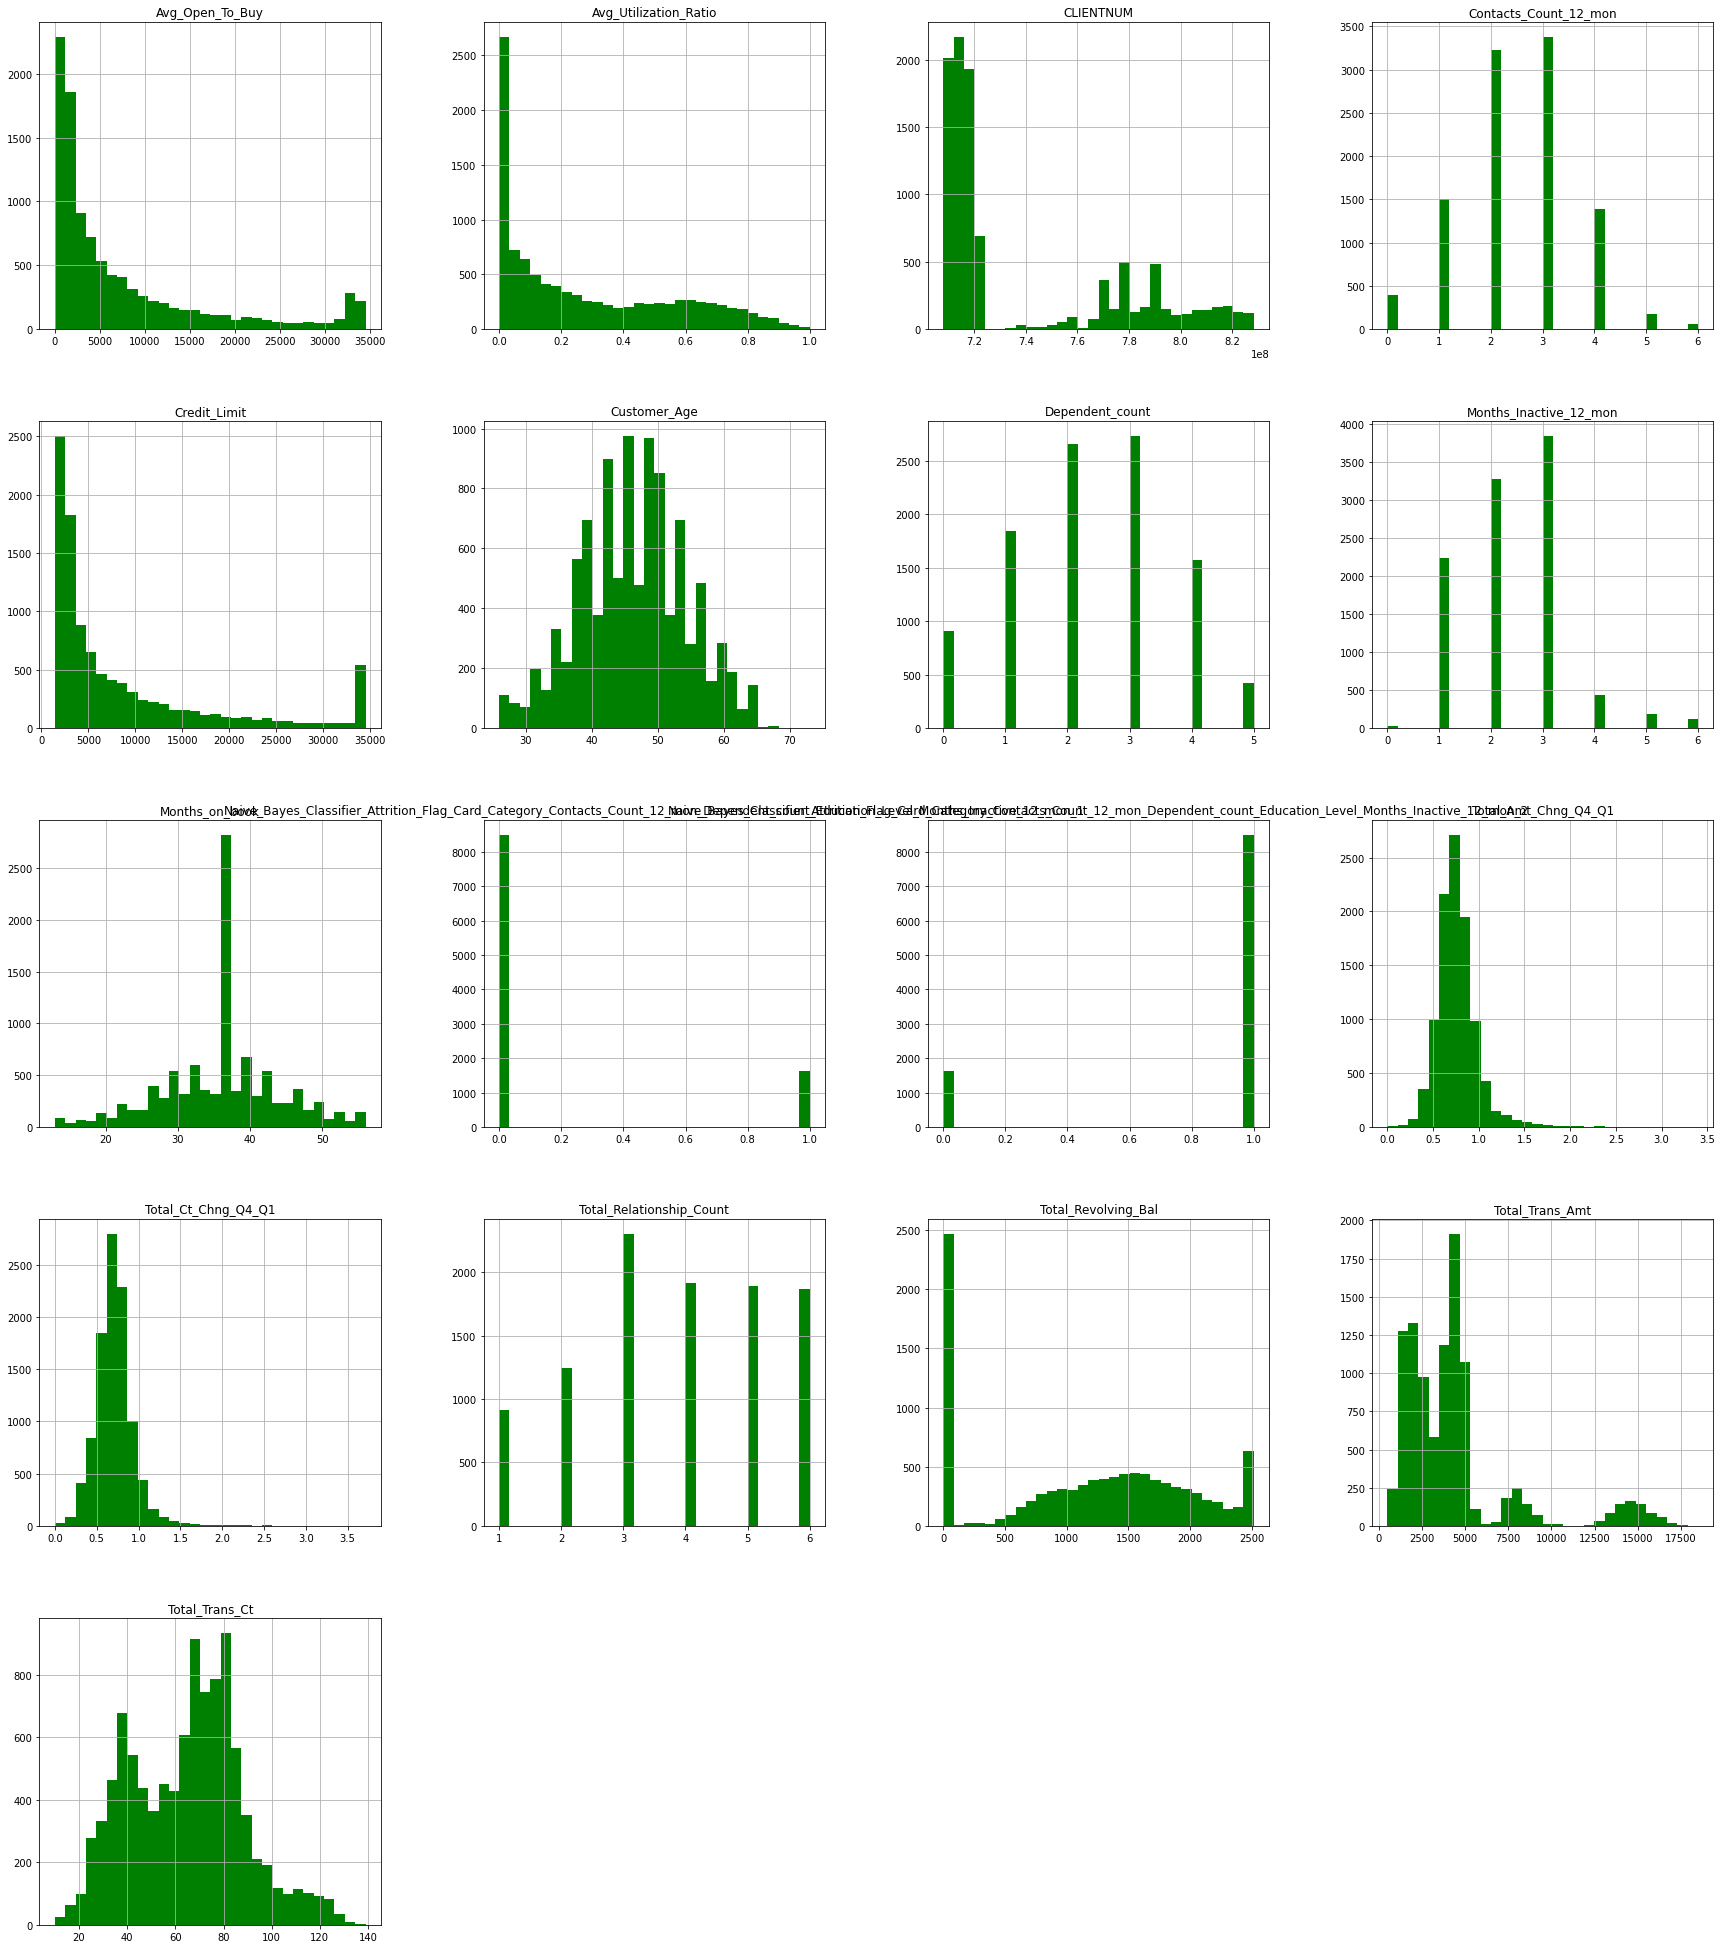

--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Visualizamos la cantidad de clientes existentes y no existentes del banco
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Visualizamos la informacion del dataset final
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
       Attrition_Flag_Existing Customer  Gender_M  Education_Level_Doctorate  \
0                                     1         1                          0   
1                                     1         0           

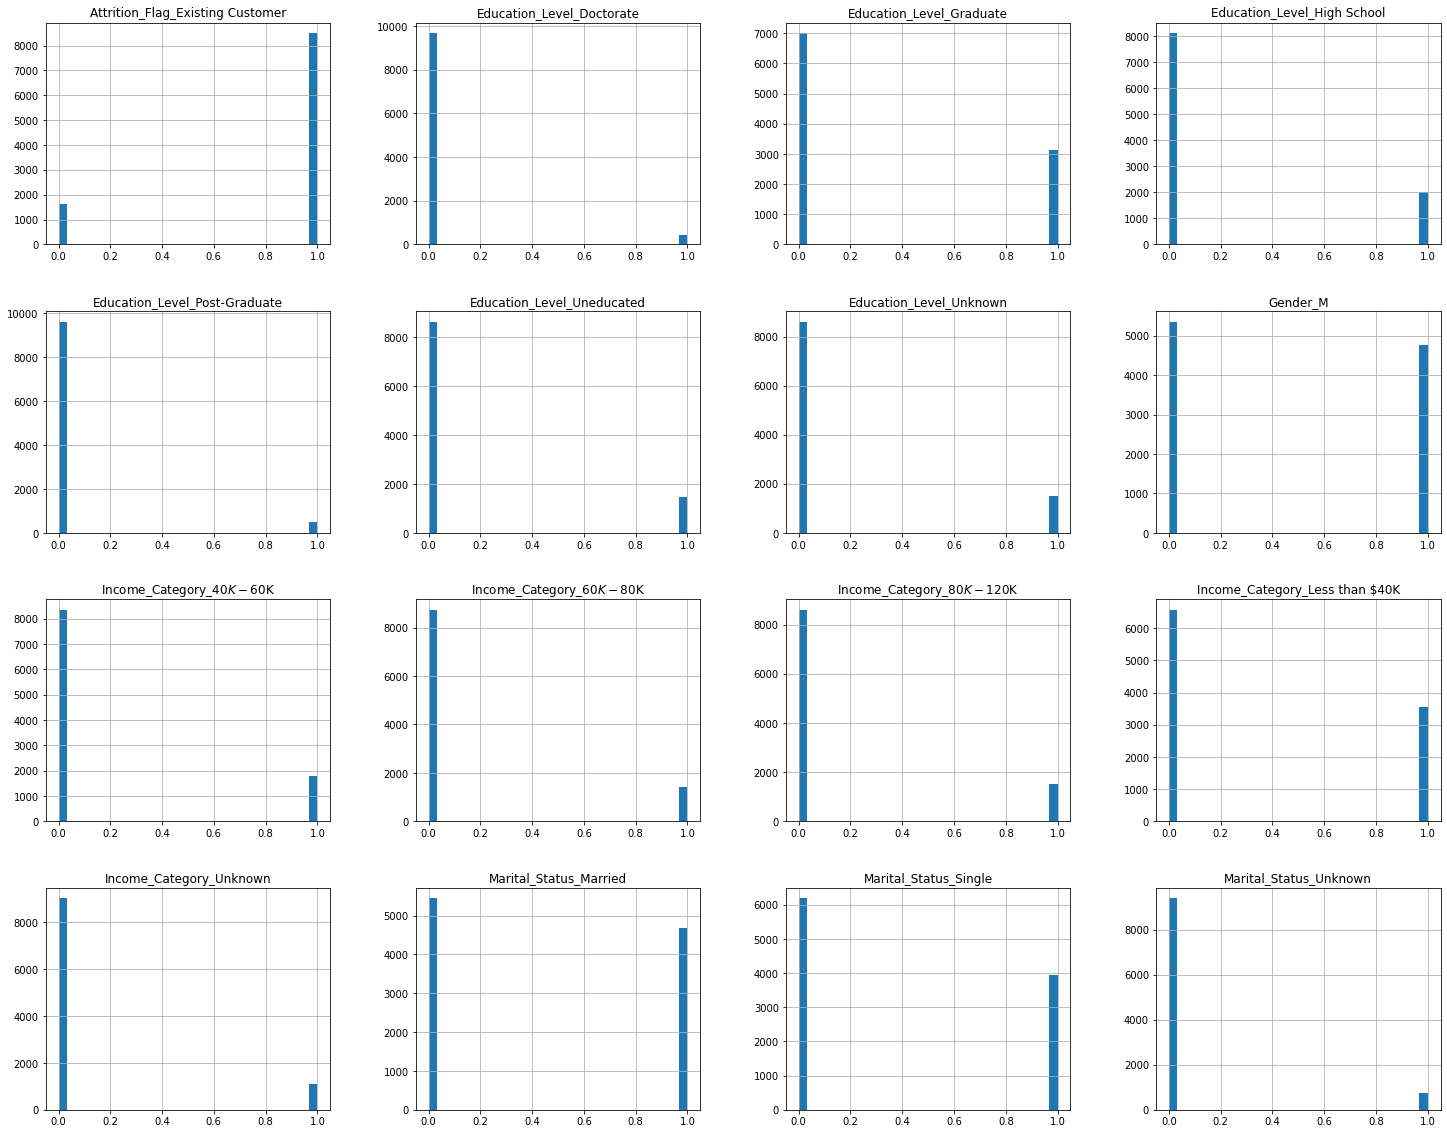

--------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Predicción del modelo
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
[1 1 1 ... 1 1 1]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Puntuación del modelo
-----------------------------------------------------------------------------------------------------------------

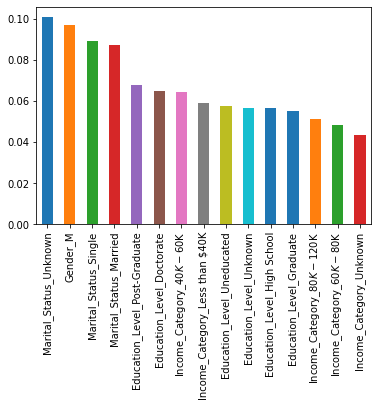

--------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Puntuacion del modelo almacenado
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Test score: 83.62 %
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prediccion del modelo almacenado
[1 1 1 ... 1 1 1]


In [10]:
#IA para predecir la pérdida o rotación de clientes del banco
#Importación de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt #para mostrar gráficos
import pandas as pd
import pickle #for save and serialize model
import warnings
warnings.filterwarnings('ignore')

customer_data = pd.read_csv('BankChurners.csv')
#customer_data.plot(kind='bar', stacked='true')
#customer_data.plot(subplots=True, figsize=(8, 8))
columns = customer_data.columns.values.tolist()


print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Análisis exploratorio del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Informacion de las columnas')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(columns)
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos los tipos de datos y estructura general del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(customer_data.info())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos la cantidad de columnas y filas del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(customer_data.shape)
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos los primeros valores del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(customer_data.head())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos la descripción del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(customer_data.describe())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Revisamos si existen valores nulos')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(customer_data.isnull().any(axis=1))
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos el histograma del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
%matplotlib inline
customer_data.hist(bins=30, color="green", figsize=(30,35))
plt.show()
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos la cantidad de clientes existentes y no existentes del banco')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
#plt.countplot(x='Attrition_Flag', data=churn_data, palette="Set2")
#plt.show()
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')


#Eliminamos las características que no utilizaremos en la predicción de nuestro modelo ya que no realizan un aporte adicional o significativo para la predicción del modelo
dataset = customer_data.drop(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Card_Category', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon',
'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

dataset_final=pd.get_dummies(dataset, drop_first=True)
#Seleccionamos los valores que serán predecidos en nuestro dataset
X = dataset_final.iloc[:, 1:]
y = dataset_final.iloc[:, 0] 
#1 para cliente existente, 0 para cliente no existente   

print('Visualizamos la informacion del dataset final')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(dataset_final)
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Análisis exploratorio del nuevo dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Informacion de las columnas')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(dataset_final.columns.tolist())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos los tipos de datos y estructura general del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(dataset_final.info())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos la cantidad de columnas y filas del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(dataset_final.shape)
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos los primeros valores del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(dataset_final.head())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos la descripción del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(dataset_final.describe())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Visualizamos el histograma del dataset')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')

%matplotlib inline
dataset_final.hist(bins=30, figsize=(25,20))
plt.show()
#%matplotlib inline
#dataset.plot(kind = "pie",subplots=True, y="Attrition_Flag", legend=False,figsize=(12,5),autopct="%.2f%%")
#contrib.plot(kind = "pie",y="Percentage",labels=['Region'],legend=False,figsize=(12,5),autopct="%.2f%%")
#plt.show()
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
#dataset.plot.pie(subplots=True)
#print('-----------------------------------------')
#print('Grafica - Dataset')
#print(dataset.plot(kind='area'))
#customer_data.plot(subplots=True, figsize=(8, 8))
#X =  dataset.drop(['Exited'], axis=1)
#y = dataset['Exited']

#Definimos los datos para el modelo
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
#Importamos el algoritmo a utilizar en nuestro modelo
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=10) 
#Definimos las variables de clasificación
clf.fit(X_train, y_train)
#Realizamos la predicción del modelo
predictions = clf.predict(X_test)
#Realizamos la predicción del training
predictions_train = clf.predict(X_train)
from sklearn.metrics import accuracy_score


print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Predicción del modelo')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(predictions)
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
#Guardamos el modelo
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
#Cargamos el modelo del disco para prueba
model = pickle.load(open(filename, 'rb'))
#result = model.score(X_test, y_test)
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Puntuación del modelo')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
#print("Test score: {0:.2f} %".format(100 * result))
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
#Importamos las librerías para las métricas de clasificación y exactitud
from sklearn.metrics import classification_report, accuracy_score
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Reporte de clasificacion')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(classification_report(y_test,predictions ))  
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Reporte de exactitud del modelo')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(accuracy_score(y_test, predictions))
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Validemos el reporte de exactitud de la variable de entrenamiento')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(accuracy_score(y_train, predictions_train))
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')

#Definimos la importancia de las características
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
#print('-----------------------------------------')
print('Nivel de importancia de las caracteristicas')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(feat_importances.nlargest(21).plot(kind='bar'))
plt.show()
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
#Calculamos el puntaje del modelo
score = model.score(X_test, y_test)  
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Puntuacion del modelo almacenado')
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print("Test score: {0:.2f} %".format(100 * score))  
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
#Definimos la predicción del modelo almacenado
y_predict = model.predict(X_test)  
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Prediccion del modelo almacenado')
print(y_predict)